In [45]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from queries.calendar_table import SELECT_CALENDAR_TABLE
from cursor_execute import cursor_execute

%matplotlib inline
plt.rcParams["font.family"] = "TakaoGothic"

In [2]:
d = cursor_execute(SELECT_CALENDAR_TABLE)
df = pd.DataFrame(
    d, 
    columns=['id', 'year', 'url', 'title', 'category', 'author',
    'parts', 'likes', 'subsc', 'items', 'actual_items']
)

In [3]:
df.head(5)

,id,year,url,title,category,author,parts,likes,subsc,items,actual_items
0,1,2015,https://qiita.com/advent-calendar/2015/comme_t...,title,To Be Decided,xxl,6,18,2,6,6
1,2,2015,https://qiita.com/advent-calendar/2015/elastic...,title,To Be Decided,JapornLady,1,0,8,3,0
2,3,2015,https://qiita.com/advent-calendar/2015/redis_p...,title,Services / Applications,JapornLady,2,0,5,2,0
3,4,2015,https://qiita.com/advent-calendar/2015/temona,title,Company,devopsCoordinator,4,22,1,6,4
4,5,2015,https://qiita.com/advent-calendar/2015/php-fiz...,title,To Be Decided,yohei_oyama,1,0,2,5,5


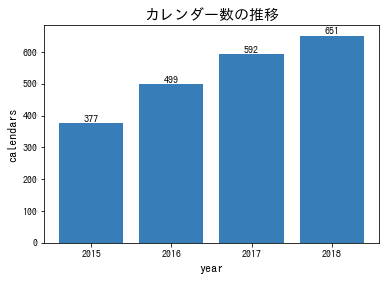

In [50]:
# カレンダー数の推移

plt.bar(
    x=df_tmp.index, height=df_tmp.values,
    color="#377eb8", label=df_tmp.values,
)
plt.title("カレンダー数の推移", fontsize=15)
plt.xlabel("year", fontsize=12)
plt.ylabel("calendars", fontsize=12)

for x, y in zip(df_tmp.index, df_tmp.values):
    plt.text(x, y, y, ha="center", va="bottom")
plt.show()